In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from scipy import stats

In [3]:
df = pd.read_csv('../data/raw/Volcano.csv')

In [4]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

              Year          Mo          Dy    Latitude   Longitude   
count   192.000000  190.000000  181.000000  192.000000  192.000000  \
mean   2004.890625    6.373684   15.718232    9.176896   51.967349   
std       9.727896    3.439937    9.268414   21.820449  103.813113   
min    1990.000000    1.000000    1.000000  -45.900000 -177.920000   
25%    1996.000000    4.000000    7.000000   -6.818250  -62.180000   
50%    2006.000000    6.000000   16.000000    3.170000  110.446000   
75%    2014.000000    9.000000   24.000000   19.421000  129.081000   
max    2020.000000   12.000000   31.000000   64.416000  177.180000   

       Elevation (m)         VEI       Deaths    Missing     Injuries   
count     192.000000  116.000000   117.000000    4.00000    45.000000  \
mean     2182.630208    2.517241    40.145299   69.25000    69.844444   
std      1309.106571    1.017095   194.123817  108.32782   298.497827   
min         0.000000    1.000000     1.000000    1.00000     1.000000   
25% 

## **Data Cleaning**

In [5]:
df_cleaned = df.copy()

In [6]:
# Get column names containing "description"
columns_to_drop = [col for col in df.columns if 'DESCRIPTION' in col.lower()]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df_cleaned)

     Year    Mo    Dy                   Name           Location      Country   
0    1990   2.0   2.0              Sheveluch          Kamchatka       Russia  \
1    1990   2.0  10.0                  Kelud               Java    Indonesia   
2    1990   3.0  26.0                 Asosan       Kyushu-Japan        Japan   
3    1990   4.0  18.0                 Asosan       Kyushu-Japan        Japan   
4    1990   5.0  29.0               Coropuna               Peru         Peru   
..    ...   ...   ...                    ...                ...          ...   
187  2019   7.0   3.0              Stromboli              Italy        Italy   
188  2019   8.0  28.0              Stromboli              Italy        Italy   
189  2019  12.0   9.0  Whakaari/White Island        New Zealand  New Zealand   
190  2020   1.0  12.0                   Taal  Luzon-Philippines  Philippines   
191  2020   5.0  29.0                   Ijen               Java    Indonesia   

     Latitude  Longitude  Elevation (m)

In [7]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop duplicate records
df_cleaned.drop_duplicates(inplace=True)

Missing Values:
Year                        0
Mo                          2
Dy                         11
Name                        0
Location                    0
Country                     0
Latitude                    0
Longitude                   0
Elevation (m)               0
Type                        0
VEI                        76
Deaths                     75
Missing                   188
Injuries                  147
Damage ($Mil)             179
Houses Destroyed          178
Total Deaths               74
Total Missing             188
Total Injuries            149
Total Damage ($Mil)       176
Total Houses Destroyed    177
dtype: int64


In [8]:
# Exclude non-numeric columns before calculating mean
numeric_columns = df_cleaned.select_dtypes(include='number').columns
df_cleaned_filled = df_cleaned.copy()
df_cleaned_filled[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Display the updated DataFrame
print(df_cleaned_filled)

     Year    Mo    Dy                   Name           Location      Country   
0    1990   2.0   2.0              Sheveluch          Kamchatka       Russia  \
1    1990   2.0  10.0                  Kelud               Java    Indonesia   
2    1990   3.0  26.0                 Asosan       Kyushu-Japan        Japan   
3    1990   4.0  18.0                 Asosan       Kyushu-Japan        Japan   
4    1990   5.0  29.0               Coropuna               Peru         Peru   
..    ...   ...   ...                    ...                ...          ...   
187  2019   7.0   3.0              Stromboli              Italy        Italy   
188  2019   8.0  28.0              Stromboli              Italy        Italy   
189  2019  12.0   9.0  Whakaari/White Island        New Zealand  New Zealand   
190  2020   1.0  12.0                   Taal  Luzon-Philippines  Philippines   
191  2020   5.0  29.0                   Ijen               Java    Indonesia   

     Latitude  Longitude  Elevation (m)

In [9]:
# Select non-numeric columns
non_numeric_columns = df_cleaned.select_dtypes(exclude='number').columns

# Display contents of non-numeric columns
for col in non_numeric_columns:
    print(f"Contents of column '{col}':")
    print(df_cleaned[col].unique())
    print()

Contents of column 'Name':
['Sheveluch' 'Kelud' 'Asosan' 'Coropuna' 'Rabaul' 'Santa Maria'
 'Nyiragongo' 'Unzendake' 'Pinatubo' 'Mutnovsky' 'Karthala'
 'Hudson, Cerro' 'Lokon-Empung' 'Etna' 'Karangetang'
 'Dieng Volcanic Complex' 'Negro, Cerro' 'Marapi' 'Spurr' 'Semeru'
 'Galeras' 'Wurlali' 'Mayon' 'Guagua Pichincha' 'Kilauea' 'Krakatau'
 'Yasur' 'Huila, Nevado del' 'Rinjani' 'Merapi' 'Yakedake' 'Fogo' 'Pacaya'
 'Kelimutu' 'Parker' 'Karymsky' 'Popocatepetl' 'Kanlaon' 'Sumisujima'
 'Maderas' 'Grimsvotn' 'Manam' 'Soufriere Hills' 'Hakkodasan'
 'Adatarayama' 'San Cristobal' 'Fuego' 'Tungurahua' 'Miyakejima' 'Arenal'
 'Stromboli' 'Reventador' 'Egon' 'Tengger Caldera' 'Santa Ana'
 'Raoul Island' 'Bulusan' 'Ritter Island' 'Salak' 'Tair, Jebel at'
 'Chaiten' 'Kasatochi' 'Redoubt' 'Eyjafjallajokull' 'Zealandia Bank'
 'Sinabung' 'Kirishimayama' 'Puyehue-Cordon Caulle' 'Nabro' 'Katla'
 'Gamalama' 'Tolbachik' 'Paluweh' 'Ubinas' 'Aira' 'Okataina' 'Ontakesan'
 'Calbuco' 'Yellowstone' 'Campi Flegrei

# **Time Trends**

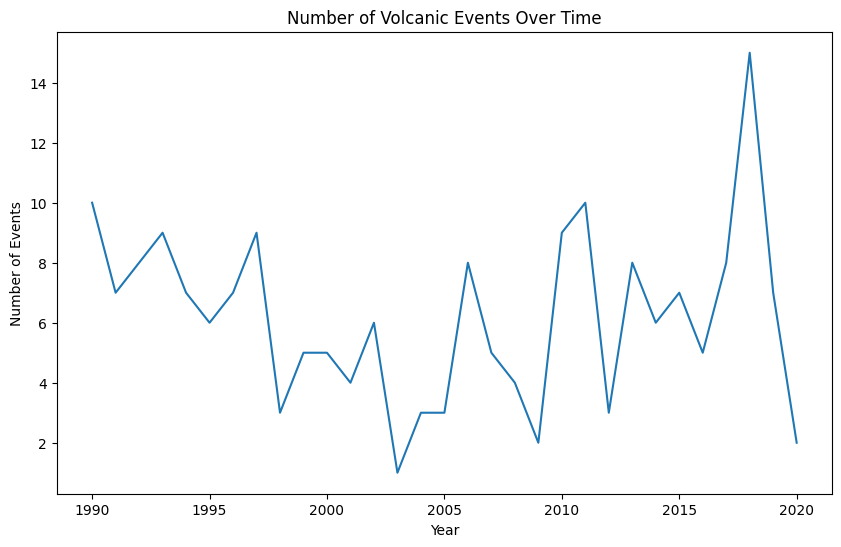

In [10]:
# Plot number of volcanic events over time
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Year').size().plot(kind='line')
plt.title('Number of Volcanic Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

# **Categorical Variables**

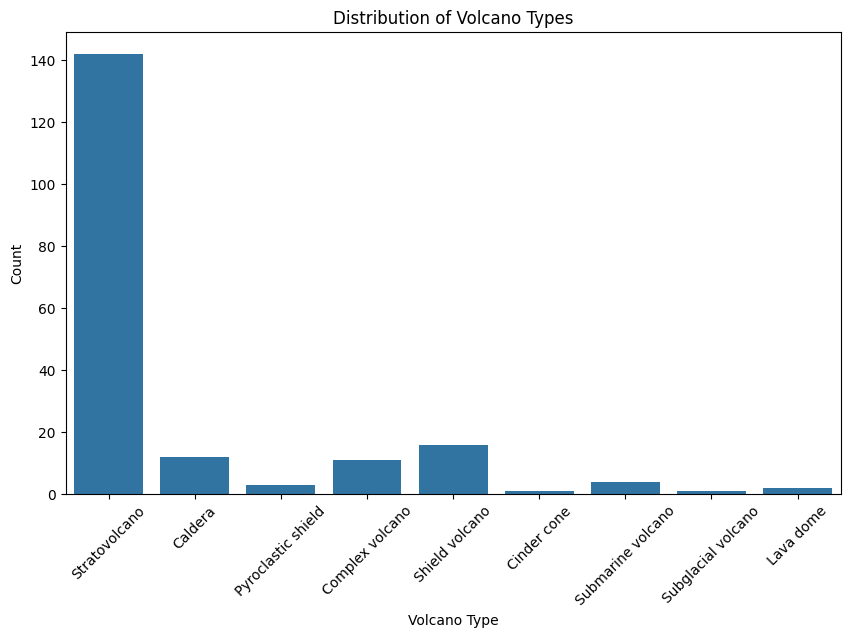

In [11]:
# Visualize distribution of 'Type' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df_cleaned)
plt.title('Distribution of Volcano Types')
plt.xlabel('Volcano Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Impact Analysis**

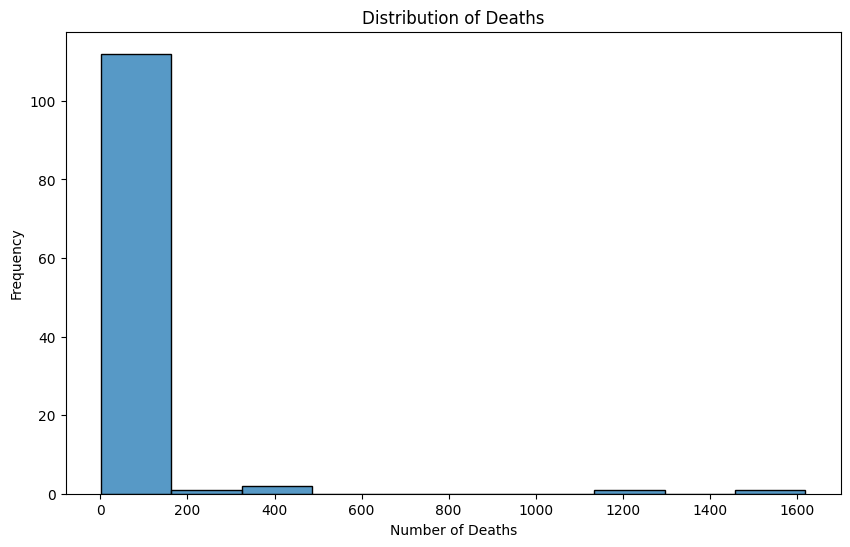

In [16]:
# Visualize distribution of 'DEATHS'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Deaths'], bins=10)
plt.title('Distribution of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()

# **Text Analysis**

In [17]:
# Display unique volcano names with customized formatting
unique_names = df_cleaned['Name'].unique()
print("\033[1mUnique Volcano Names:\033[0m")  # Bold text
for name in unique_names:
    print("\033[91m{}\033[0m".format(name))  # Red font color

Unique Volcano Names:
Sheveluch
Kelud
Asosan
Coropuna
Rabaul
Santa Maria
Nyiragongo
Unzendake
Pinatubo
Mutnovsky
Karthala
Hudson, Cerro
Lokon-Empung
Etna
Karangetang
Dieng Volcanic Complex
Negro, Cerro
Marapi
Spurr
Semeru
Galeras
Wurlali
Mayon
Guagua Pichincha
Kilauea
Krakatau
Yasur
Huila, Nevado del
Rinjani
Merapi
Yakedake
Fogo
Pacaya
Kelimutu
Parker
Karymsky
Popocatepetl
Kanlaon
Sumisujima
Maderas
Grimsvotn
Manam
Soufriere Hills
Hakkodasan
Adatarayama
San Cristobal
Fuego
Tungurahua
Miyakejima
Arenal
Stromboli
Reventador
Egon
Tengger Caldera
Santa Ana
Raoul Island
Bulusan
Ritter Island
Salak
Tair, Jebel at
Chaiten
Kasatochi
Redoubt
Eyjafjallajokull
Zealandia Bank
Sinabung
Kirishimayama
Puyehue-Cordon Caulle
Nabro
Katla
Gamalama
Tolbachik
Paluweh
Ubinas
Aira
Okataina
Ontakesan
Calbuco
Yellowstone
Campi Flegrei
Ambae
Kadovar
Kusatsu-Shiranesan
Ijen
Ambrym
Ulawun
Whakaari/White Island
Taal


# **Correlation Analysis**

In [19]:
df_cleaned.columns

Index(['Year', 'Mo', 'Dy', 'Name', 'Location', 'Country', 'Latitude',
       'Longitude', 'Elevation (m)', 'Type', 'VEI', 'Deaths', 'Missing',
       'Injuries', 'Damage ($Mil)', 'Houses Destroyed', 'Total Deaths',
       'Total Missing', 'Total Injuries', 'Total Damage ($Mil)',
       'Total Houses Destroyed'],
      dtype='object')

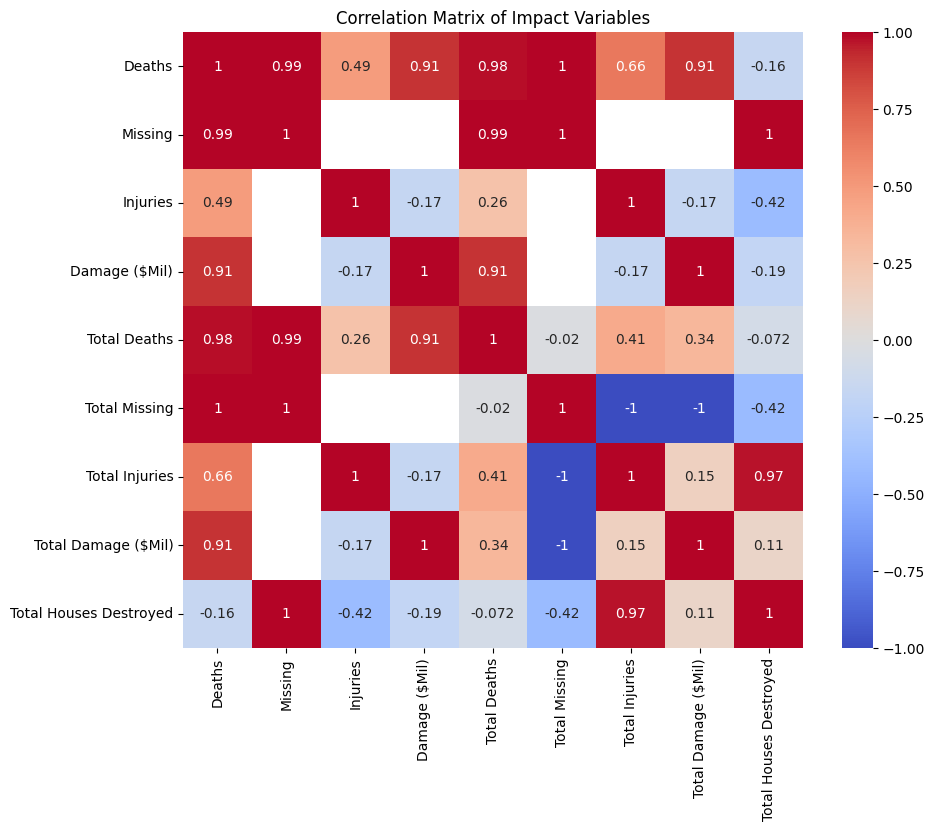

In [20]:
# Correlation analysis: Heatmap of correlations between impact variables
impact_variables = ['Deaths', 'Missing', 'Injuries', 'Damage ($Mil)', 'Total Deaths',
                    'Total Missing', 'Total Injuries', 'Total Damage ($Mil)', 'Total Houses Destroyed']
impact_data = df_cleaned[impact_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(impact_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Impact Variables')
plt.show()

# **Outlier detection**

In [21]:
# Detect outliers in 'DEATHS' using z-score
z_scores = stats.zscore(df_cleaned['Deaths'])
outliers = df_cleaned[(z_scores > 3) | (z_scores < -3)]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Year, Mo, Dy, Name, Location, Country, Latitude, Longitude, Elevation (m), Type, VEI, Deaths, Missing, Injuries, Damage ($Mil), Houses Destroyed, Total Deaths, Total Missing, Total Injuries, Total Damage ($Mil), Total Houses Destroyed]
Index: []

[0 rows x 21 columns]


# **Interactive visualisation**

# **Geospatial Analysis**

In [22]:
# Create a map of volcano locations
map_volcanoes = folium.Map(location=[df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()], zoom_start=2)
for index, row in df_cleaned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Name']).add_to(map_volcanoes)
map_volcanoes.save('volcano_map.html')

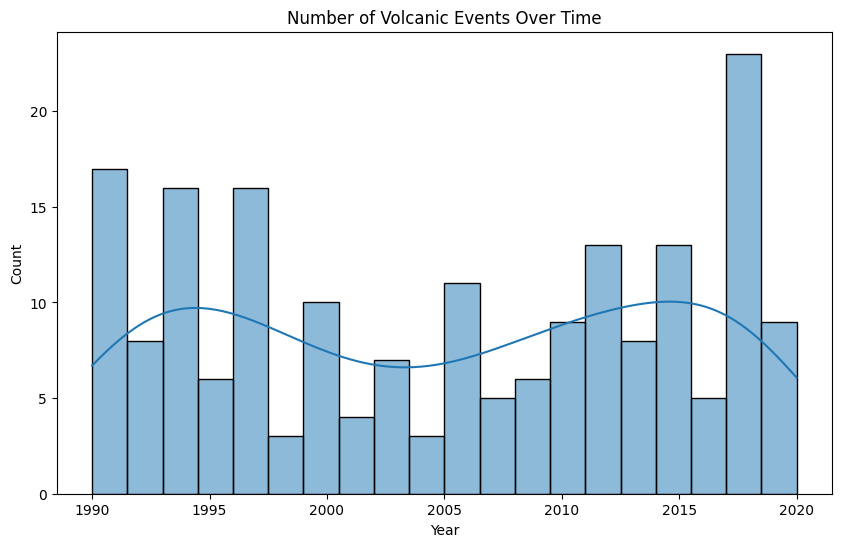

In [23]:
# Temporal trends: Number of volcanic events over time
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Year', bins=20, kde=True)
plt.title('Number of Volcanic Events Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [24]:
# Create the interactive scatter plot
fig = px.scatter(df_cleaned, x='Deaths', y='Damage ($Mil)AGE_MILLIONS_DOLLARS', color='Type', hover_name='Name')
fig.update_layout(title='Volcano Impact: Deaths vs Damage (Millions of Dollars)',
                  xaxis_title='Number of Deaths',
                  yaxis_title='Damage (Millions of Dollars)')

# Save the scatter plot to an HTML file
fig.write_html('volcano_impact_analysis.html')

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Year', 'Mo', 'Dy', 'Name', 'Location', 'Country', 'Latitude', 'Longitude', 'Elevation (m)', 'Type', 'VEI', 'Deaths', 'Missing', 'Injuries', 'Damage ($Mil)', 'Houses Destroyed', 'Total Deaths', 'Total Missing', 'Total Injuries', 'Total Damage ($Mil)', 'Total Houses Destroyed'] but received: DEATHS

In [19]:
# Create the map
fig = px.scatter_geo(df_cleaned, lat='Latitude', lon='Longitude', hover_name='Name', scope='world')
fig.update_geos(showcountries=True, countrycolor='black', countrywidth=0.5)
fig.update_layout(title='Geographical Distribution of Volcanoes')

# Save the map to an HTML file
fig.write_html('volcano_geographical_distribution.html')

In [20]:
# Create the map
fig = px.scatter_geo(df_cleaned, lat='Latitude', lon='Longitude', hover_name='Type', scope='world')
fig.update_geos(showcountries=True, countrycolor='black', countrywidth=0.5)
fig.update_layout(title='Geographical Distribution of Volcanoes')

# Save the map to an HTML file
fig.write_html('volcanotype_geographical_distribution.html')

In [21]:
# Create the interactive scatter plot
fig = px.scatter(df_cleaned, x='DEATHS', y='DAMAGE_MILLIONS_DOLLARS', color='Type', hover_name='Name')
fig.update_layout(title='Volcano Impact: Deaths vs Damage (Millions of Dollars)',
                  xaxis_title='Number of Deaths',
                  yaxis_title='Damage (Millions of Dollars)')

# Save the scatter plot to an HTML file
fig.write_html('volcano_impact_analysis.html')

In [22]:
# Save clean data to use in tableau
df_cleaned.to_csv('cleaned_volcano_data.csv', index=False)

# **End of Code**